### Introduction and Mission Statement

In [1]:
# This data set being loaded contains the info of many different airbnb listings in the Boston area and whether the 
# listing was of fraudulant nature. While the introduction of AirBnB as been very convenient for its consumers in which it 
# provides a cheaper alternative to hotels, it also gives many the opportunity to commit fraud. This could include 
# fake listings in which accommadation is paid for but not given in return. With the information in this dataset, we 
# can differentiate the characteristics that seperate legitimate listings versus fraudulant ones in order to then 
# predict whether a listing is fraudulant, and thus prevent the event of it occurring in a timely manner.  

### Loading the Dataset

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

airbnb = pd.read_csv('data/output.csv')
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

In [3]:
airbnb.head(10) 

# Each row represents a single airbnb listing while each column describes a characteristic of said listing
# Each column contains numerical data, with categorical data being represented through numbers as well. 
# In the fraud column for example, we characterize fraud through the number 1, while no fraud is represented through 0

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
0,90,1,6,1,1,0,1,1,1.0,1.0,1.0,4,547,4000,7,34,90.0,0,2,0.38,0
1,100,1,7,2,1,8,1,2,1.0,1.0,1.0,4,1158,14500,3,36,91.0,0,2,0.40,0
2,100,1,7,2,1,0,0,4,1.0,1.0,2.0,4,2016,19500,3,47,95.0,0,2,0.54,1
3,100,1,1,2,1,0,1,2,1.0,1.0,1.0,4,964,6500,3,41,98.0,0,1,0.47,0
4,100,0,12,2,1,0,0,3,1.0,1.0,1.0,4,1794,15400,30,18,91.0,0,1,0.21,0
5,94,0,5,2,1,0,0,4,2.0,2.0,2.0,4,1519,22500,3,13,100.0,0,3,0.18,1
6,89,1,558,2,1,0,0,2,1.0,1.0,1.0,4,1573,22900,2,9,89.0,0,3,0.15,0
7,89,1,558,2,1,0,0,2,1.0,1.0,1.0,4,131,20900,2,22,78.0,0,3,0.35,0
8,89,1,558,2,1,0,0,3,1.0,1.0,1.0,4,1135,25900,4,3,90.0,0,3,0.04,0
9,89,1,558,2,1,0,0,4,1.0,2.0,2.0,4,1299,34200,2,21,87.0,0,3,0.35,0


In [4]:
airbnb.info()

# These are each of the 20 columns of the dataset, we will be using the fraud column as a our basis for the target variable 
# The other columns will be investigated as potential candidate variables that will be used to predict whether the 
# listing is fraudulant 
# The data type for each column is either an int or float data type, no conversion is necessary as a result. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   float64
 10  beds                       3585 non-null   float64
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [5]:
airbnb.describe() 

# We have a total of 3585 entries of airbnb listings in this dataset with 20 columns of listed features 
# It was determined there are no outliers in this dataset, although it may appear some prices are obvious outliers, 
# given the other features of the data entry, it is a fair assessement.

,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
count,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,95.64742,0.726081,58.902371,2.820363,0.859135,1.873361,0.429010,3.041283,1.220781,1.255230,1.607531,3.909902,1570.437378,17392.580195,3.171269,19.044630,93.749791,0.165690,1.210042,1.766165,0.213947
std,11.78841,0.446030,171.119663,4.071361,0.347930,3.327397,0.538211,1.778929,0.500698,0.752129,1.010933,0.511011,873.197307,14833.132129,8.874133,35.571658,9.039049,0.371854,0.877998,1.924877,0.410147
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.010000,0.000000
25%,98.00000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,844.000000,8500.000000,1.000000,1.000000,91.000000,0.000000,0.000000,0.640000,0.000000
50%,100.00000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1604.000000,15000.000000,2.000000,5.000000,97.000000,0.000000,1.000000,1.000000,0.000000
75%,100.00000,1.000000,7.000000,2.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2280.000000,22000.000000,3.000000,21.000000,100.000000,0.000000,2.000000,2.130000,0.000000
max,100.00000,1.000000,749.000000,37.000000,1.000000,12.000000,2.000000,16.000000,6.000000,5.000000,16.000000,4.000000,3091.000000,400000.000000,300.000000,404.000000,100.000000,1.000000,3.000000,19.150000,1.000000


### Data Cleaning 

In [6]:
airbnb.isna().sum() 

# None of the columns have any NaN or missing values, therefore, dropping any NaN values is not necessary

host_response_rate           0
host_identity_verified       0
host_total_listings_count    0
city                         0
is_location_exact            0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
minimum_nights               0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
fraud                        0
dtype: int64

In [7]:
print(airbnb.duplicated().sum())
airbnb[airbnb.duplicated()] 

# However, we have many rows of duplicated data in our dataset. Specifically there are 36 rows of duplicated data. 
# The dataframe below contains all rows in which were duplicated. We will be removing these rows from our data set

36


,host_response_rate,host_identity_verified,host_total_listings_count,city,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,fraud
1295,100,1,52,2,1,0,0,2,1.0,0.0,1.0,4,1003,15000,7,0,100.0,0,2,1.00,0
1311,100,1,52,2,1,0,0,2,1.0,0.0,1.0,4,1003,13700,7,0,100.0,0,2,1.00,0
1464,100,1,52,2,1,0,0,2,1.0,0.0,1.0,4,1003,13700,7,0,100.0,0,2,1.00,0
1519,100,1,52,2,1,0,0,2,1.0,0.0,1.0,4,1001,15000,7,0,100.0,0,2,1.00,0
1590,100,1,52,2,1,0,0,2,1.0,0.0,1.0,4,1001,15000,7,0,100.0,0,2,1.00,0
1637,100,1,52,2,1,0,0,2,1.0,0.0,1.0,4,1001,13700,7,1,100.0,0,2,0.09,0
1638,98,1,749,2,1,0,0,3,1.0,1.0,1.0,4,1873,16900,3,0,100.0,0,2,1.00,0
1716,98,1,749,2,1,0,0,5,2.0,2.0,2.0,4,1856,31900,3,0,100.0,0,2,1.00,0
1718,98,1,749,2,1,0,0,5,2.0,2.0,2.0,4,1858,31900,3,0,100.0,0,2,1.00,0
2113,98,1,749,2,1,0,0,5,2.0,2.0,2.0,4,1322,31900,3,0,100.0,0,2,1.00,0


In [8]:
airbnb = airbnb.drop_duplicates(keep = 'first')
airbnb.shape

# We have dropped the 36 rows of duplicated data, which leads to our total row count drop from 3585 initially to 3549

(3549, 21)

### Exploratory Analysis of Data and Identifying Trends

In [9]:
# To begin, we will be analyzing our columns to determine which ones are suitable input variables that will help us 
# predict our target variable. 

# First, we will be analyzing categorical variables and then numerical variables. 

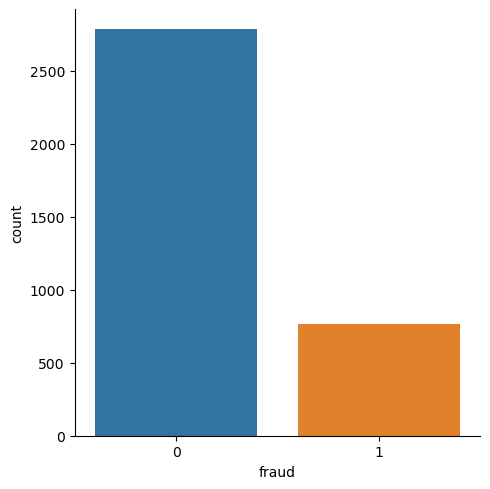

fraud
0    2782
1     767
Name: count, dtype: int64


In [10]:
import warnings 
warnings.filterwarnings('ignore') # Done to remove warnings when displaying visualizations

sns.catplot(data = airbnb, x = 'fraud', kind = 'count')
plt.show()
print(airbnb['fraud'].value_counts())

# But first, a quick visualization of our target variable, we see we have 2782 counts of non-fraud versus 767 cases of fraud

In [11]:
# The categorical variables can be classified as either binary or continuous; 

# Continuous categorical variables include: Room type, City, Bed Type, Property Type and Cancellation Policy 
# Binary categorical variables include: Is Location Exact, Host Identity Verified and Instant Bookable 

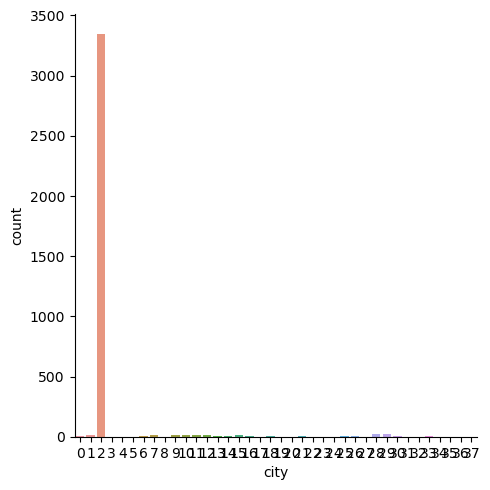

In [12]:
sns.catplot(data = airbnb, x = 'city', kind = 'count')
plt.show() 

# We see below that by far the majority of listings is within city 2, and given this dataset is for the Boston area, 
# the city category will not be considered as an important variable in our model 

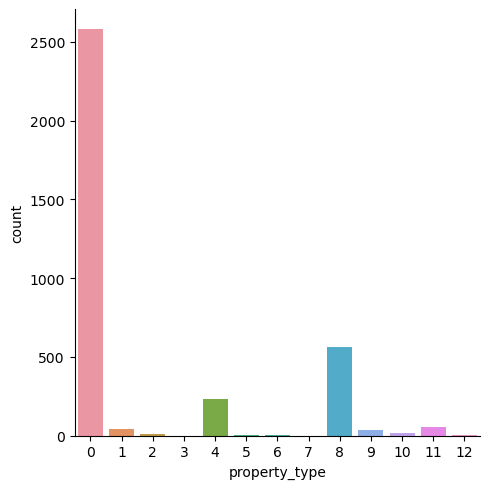

In [13]:
sns.catplot(data = airbnb, x = 'property_type', kind = 'count')
plt.show()

# We see here that most listings have been distributed to the property type 0 for the property type variable. 
# Therefore, the property type variable does not tell us much and will be omitted from use for our model 

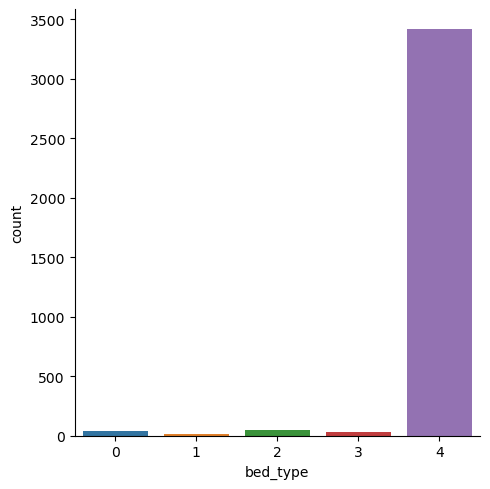

In [14]:
sns.catplot(data = airbnb, x = 'bed_type', kind = 'count')
plt.show()

# The same can be said about the bed type category in the dataset, it appears most data entries have bed type 4. 
# Therefore, we will not be using the bed type as an input variable in our model as it does not tell us anything 

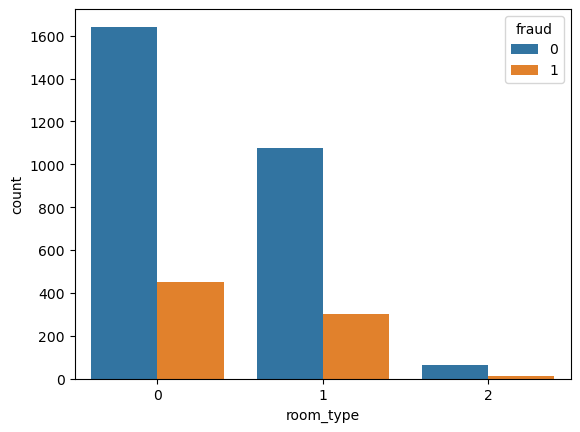

In [15]:
sns.countplot(x= 'room_type', hue='fraud', data= airbnb) 
plt.show()

# For the room type variable, we see a more even distribution within the category and may potentially be able to predict 
# our target variable, we will not be omitting this variable as of now. 

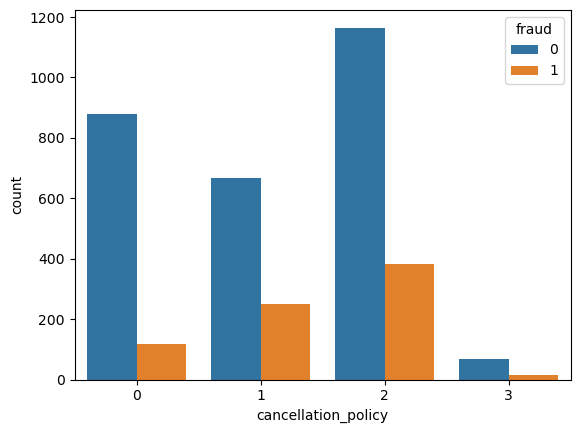

In [16]:
sns.countplot(x= 'cancellation_policy', hue='fraud', data=airbnb) 
plt.show()

# We see the same occurs for the cancellation policy, since it is more varied across the category in both count and fraud
# we will not be omitting variable from our model as of now either

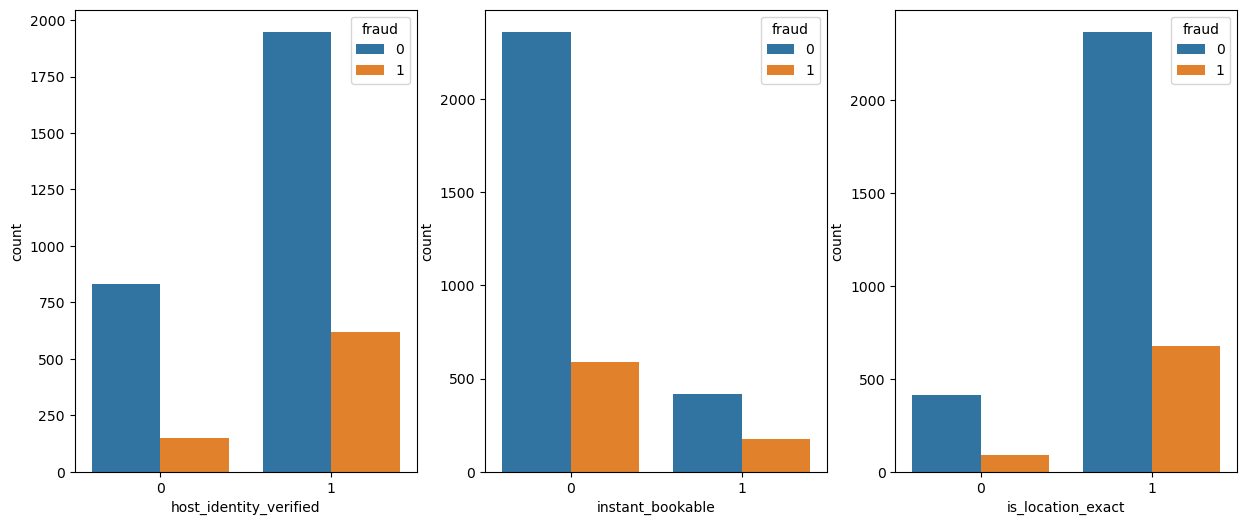

In [17]:
fig, ax = plt.subplots(1, 3, figsize = (15, 6))

sns.countplot(x = 'host_identity_verified', data = airbnb, hue = 'fraud', ax = ax[0])
sns.countplot(x = 'instant_bookable', data = airbnb, hue = 'fraud', ax = ax[1])
sns.countplot(x = 'is_location_exact', data = airbnb, hue = 'fraud', ax = ax[2])
plt.show()

# For our 3 binary categorical columns, we see they are distributed more fairly and not heavily towards one category. 
# Therefore, all 3 of these categorical variables will be of potential use for us to predict our target variable

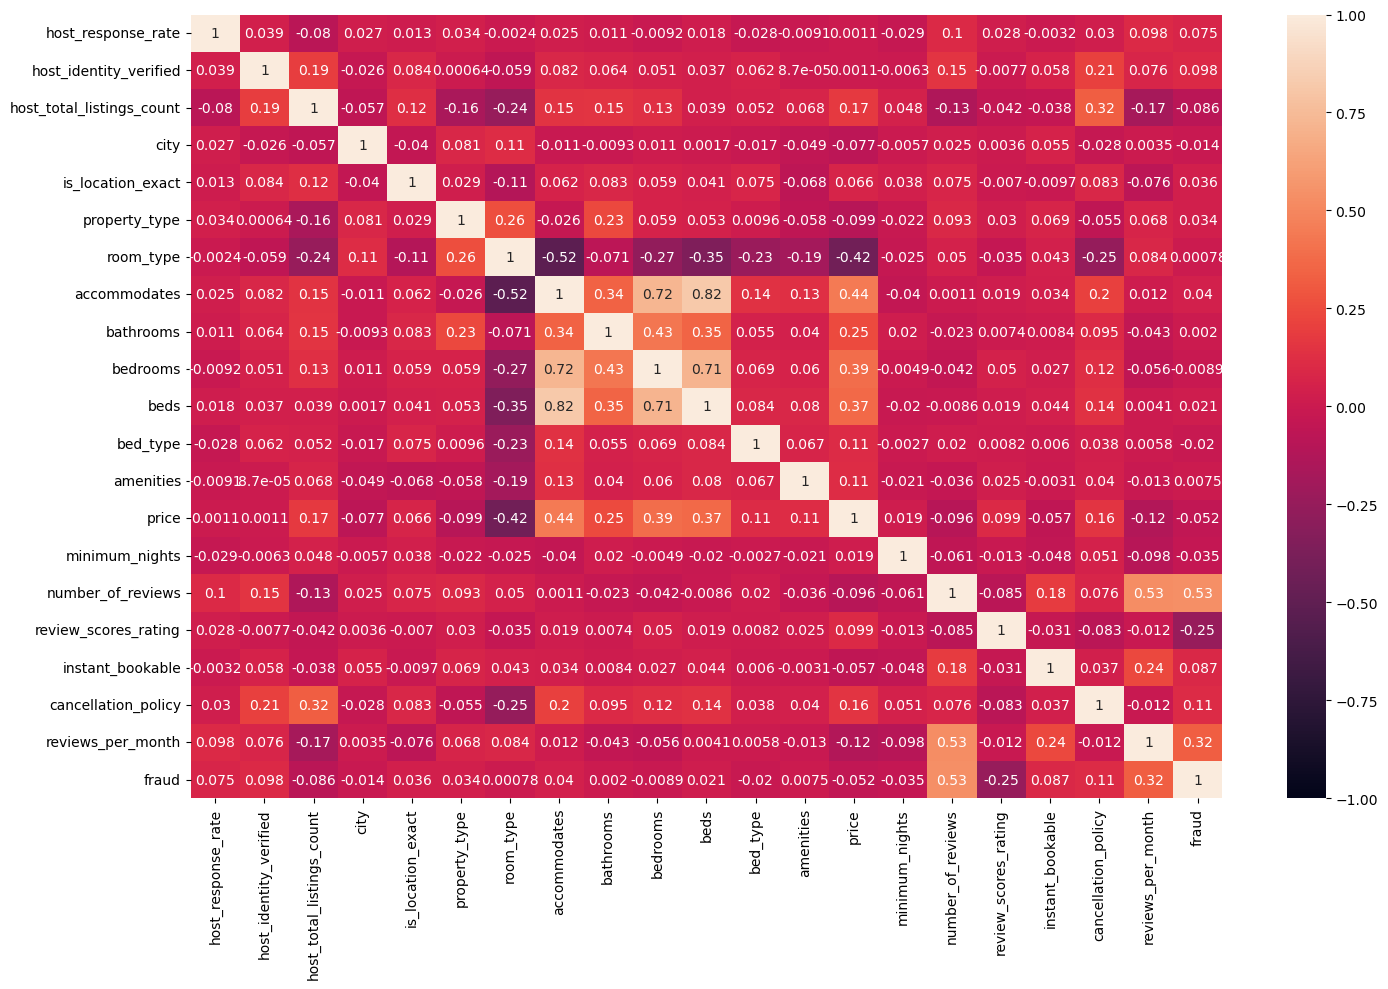

In [18]:
# For the numerical variables in our dataset, it would be best to visualize the relationship between these variables 
# and our target variable through a correlation matrix. 

# NumericaL variables include; Host response rate, host total listings, accomodates, bedrooms, beds, bathrooms, amenities,
# price, min nights, reviews, review score rating, and reviews per month 

plt.figure(figsize = (15, 10))
sns.heatmap(airbnb.corr(), vmin = -1, vmax = 1, annot = True)
plt.tight_layout()
plt.show()

In [19]:
airbnb.corr()['fraud'].sort_values(ascending = False)

fraud                        1.000000
number_of_reviews            0.532263
reviews_per_month            0.321267
cancellation_policy          0.108328
host_identity_verified       0.097983
instant_bookable             0.087338
host_response_rate           0.075115
accommodates                 0.039517
is_location_exact            0.035545
property_type                0.034360
beds                         0.021478
amenities                    0.007541
bathrooms                    0.002031
room_type                    0.000777
bedrooms                    -0.008856
city                        -0.014158
bed_type                    -0.020258
minimum_nights              -0.034821
price                       -0.051955
host_total_listings_count   -0.085581
review_scores_rating        -0.245719
Name: fraud, dtype: float64

In [20]:
# When we take a deeper look into the correlation matrix, we see the number of reviews as well as reviews per month have 
# the strongest positive correlation with fraud in our data set out of all numerical variables. This makes sense as when 
# there is a fraudulant listing, consumers would likely report or flag the listing through reviews to prevent it 
# from happening to others. Therefore, the number of reviews and reviews per month will be a primary variables 
# in our prediction model. This finding also corresponds with the negative correlation found in the review score variable, 
# as victims of fraud are unlikely to give a pleasent review afterwards. This variable will also be used strongly 
# in our model. 

In [21]:
fraud_gb = airbnb.groupby('fraud')

print(fraud_gb['number_of_reviews'].median())
print(fraud_gb['reviews_per_month'].median())
print(fraud_gb['review_scores_rating'].median())

# This is more apparent when we compare the medians of these variables between fraud and non fraud. Clearly, on average
# there are more reviews in fraudulant listings, as well as a lower review score on average. 

fraud
0     3.0
1    37.0
Name: number_of_reviews, dtype: float64
fraud
0    1.00
1    2.35
Name: reviews_per_month, dtype: float64
fraud
0    99.0
1    92.0
Name: review_scores_rating, dtype: float64


In [22]:
# It appears some numerical variables may not have any correlation with fraud, such beds and bathrooms. However, 
# we will still use these variables for our model for now as they are fairly distrubted and may be of potential use for 
# predicting other variables in the data set. 

In [23]:
# However, when we analyze the price variable, we see a difference in the average price between fraud and non fraud

fraud_gb['price'].median()

fraud
0    15000.0
1    13300.0
Name: price, dtype: float64

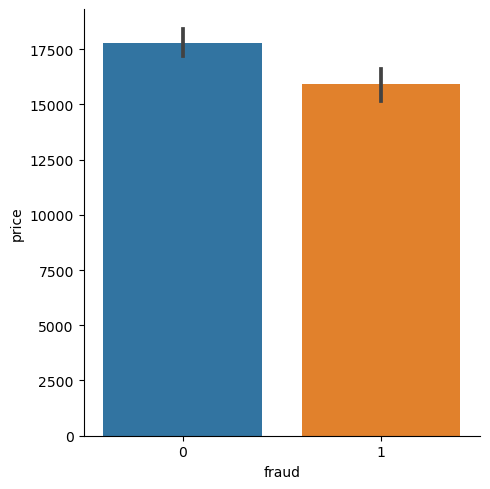

In [24]:
# This could indicate that potentially fraudsters aim to commit fraud in the airbnb market by targetting lower budget 
# customers. This idea is supported with the negative correlation between fraud and price outputted, although it is a 
# a weak one. If this is the case, price should be an important variable in our model. This idea is further visualized 
# in the bar plot below, as we can see a smaller bar on the fraud category.

sns.catplot(data=airbnb, x='fraud', y='price', kind = 'bar')
plt.show()

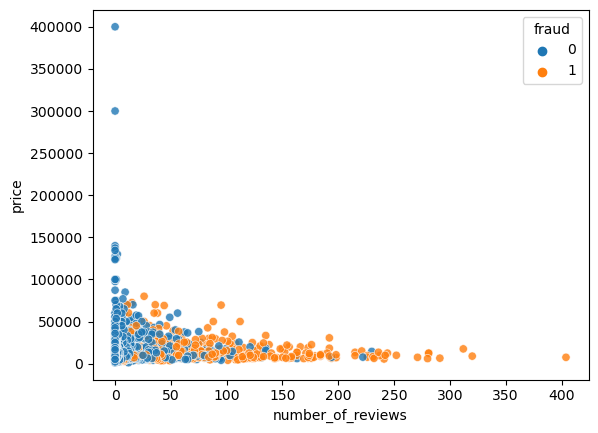

In [25]:
# In summary, we have determined which variables will not be used in our model and have labelled more of the critical 
# ones that may help us predict potential fraud, such as the review variables as well as price. As a final visualization, 
# we can see how these two variables interact with fraud. The visualization below shows there may be a relationship between
# reviews as well as a possible price range in which can then predict fraud. 

plt.figure()
sns.scatterplot(data=airbnb, x= 'number_of_reviews', y= 'price', hue = 'fraud', alpha = 0.8)
plt.show()

### Model and Validation 

In [26]:
# For our model we will be using the random forest classifier in order to predict whether a listing is of fraudulant nature

# Here we are splitting our data into x and y 
# For our x variables, we have selected all the columns except for the ones we excluded, which are city, property type and 
# bed type. For our y variable, it is simply our target variable, which is fraud. 

x = airbnb.loc[:, ['host_response_rate', 'host_identity_verified',
       'host_total_listings_count', 'is_location_exact',
        'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month',]]

y = airbnb.loc[:, 'fraud']

In [27]:
from sklearn.model_selection import train_test_split

# Here we are doing our train test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 99)

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8, 
                            min_samples_split = 10,
                            random_state = 5)

In [29]:
clf.fit(x_train, y_train) # Here we are training our model

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [30]:
y_pred = clf.predict(x_test) # We are now using the test data to make predictions of fraud, below we can see the predictions
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [31]:
# We will now evaluate the model to determine it's accuracy and usability

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred)) 

# When we compare the real results vs the predicted results, we have a prediction accuracy of almost 86 percent, which 
# is a fairly good score

0.8592342342342343


In [33]:
# We will use a confusion matrix to further understand our predictions and model performance

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

pd.DataFrame(conf_matrix, index = ['Actual Non Fraud', 'Actual Fraud'], 
             columns = ['Predicted Non Fraud', 'Predicted Fraud'])

# We see below in the confusion matrix that the model performs well in predicting non fraud, however, it can improve in 
# the fraud category, as it predicts non fraud often times. In this case, more data may be needed to further train 
# this model to differentiate between fraud and non fraud. Overall, majority of the time model will predict the right 
# outcome. 

,Predicted Non Fraud,Predicted Fraud
Actual Non Fraud,651,41
Actual Fraud,84,112


In [34]:
# To further validate our model, we will be doing cross validation in order to prevent overfitting our data and 
# determine how well the model will do over different training sets of data. 

from sklearn.model_selection import cross_val_score 
cross_val_score(clf, x_train, y_train, cv=10)

# We see that at least all cross validation performances of the model are at least 81 percent correct and even going as 
# high as 89 percent, showing that the model may be fit for predicting real world datasets. 

array([0.87640449, 0.83834586, 0.83458647, 0.86842105, 0.87593985,
       0.81578947, 0.84586466, 0.82706767, 0.89097744, 0.84586466])

In [35]:
from sklearn.metrics import classification_report 
print(classification_report(y_pred, y_test))

# Finally, when we print our classification report, we see the same results; model does a good job in predicting non fraud
# but will need to improve on correctly predicting fraud. The larger F1 value for non fraud supports this finding. 

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       735
           1       0.57      0.73      0.64       153

    accuracy                           0.86       888
   macro avg       0.76      0.81      0.78       888
weighted avg       0.88      0.86      0.87       888



### Conclusion

In [ ]:
# In conclusion, we see that the model does a good job in predicting non fraud. However, more data is most likely needed 
# in order for the model to learn and differentiate between fraud and non fraud. But despite this, the model still 
# correctly predicts the outcome approximately 86 percent of the time. 

# We saw through the building of this model, each of the review variables as well as price was likely important variables 
# in predicting fraud. Moving forward, any future models should heavily consider these variables of importance. With this
# current model, AirBnB can consider using this to flag any future listings that come under the fraud category and trigger
# a review. 